# `HAH913E-2024-ECG_001.jpynb`: Read and plot ECG data

In this Jupyter notebook, we read and plot ECG data from a healthy subject.

### 1.1. Define the path to the ECG file

The path to the file is `data/ECG_hz.txt`, starting from the root of the project.  
However, the present notebook is located in the `notebooks` folder, so we need to go up one level to reach the `data` folder:
  1. go up one level: `../` 
  1. then, reach the `data` folder: `../data/`
  1. then, reach the file: `../data/ECG_hz.txt`

In [25]:
@fNameECG == "/Users/verdianeouattara/Downloads/ECGu.txt"

SyntaxError: incomplete input (605887288.py, line 1)

However, if we `%run` this notebook from another notebook, the path is expected from the other notebook. So we need a way to define the path to the file in a way that is independent of the notebook that is running the present notebook.

In [47]:
# if the present working directory is the directory of this file, change the path to the project root
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

fNameECG = "/Users/verdianeouattara/Downloads/ECGu.txt"

### 1.2. Read the ecg file

In [48]:
import numpy as np 

ecg = np.genfromtxt(fNameECG, delimiter=' ')

# 2. Plot the content of the `egc` variable 

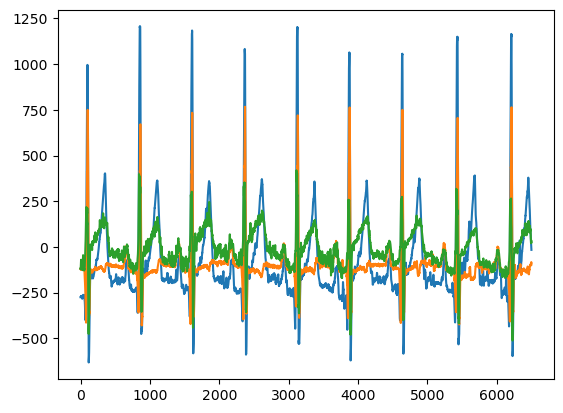

ecg_00.ipynb finished


In [49]:
import matplotlib.pyplot as plt 

plt.plot(ecg)
plt.show()

print("ecg_00.ipynb finished")

In [50]:
import pandas as pd 

ECG = pd.read_csv (fNameECG,sep= " ") 
print(ECG)

      -275.0\t  -119.0\t  -119.0\t.1  Unnamed: 3
0       -275.0    -119.0      -119.0         NaN
1       -275.0    -118.0      -121.0         NaN
2       -275.0    -121.0      -112.0         NaN
3       -273.0    -120.0      -105.0         NaN
4       -274.0    -124.0      -101.0         NaN
...        ...       ...         ...         ...
6494       3.0     -92.0        28.0         NaN
6495       1.0     -86.0        22.0         NaN
6496      -4.0     -83.0        21.0         NaN
6497      -9.0     -88.0        31.0         NaN
6498     -16.0     -96.0        33.0         NaN

[6499 rows x 4 columns]


In [51]:
ECG.columns= ['I', 'II','III','IV']
print(ECG)

          I     II    III  IV
0    -275.0 -119.0 -119.0 NaN
1    -275.0 -118.0 -121.0 NaN
2    -275.0 -121.0 -112.0 NaN
3    -273.0 -120.0 -105.0 NaN
4    -274.0 -124.0 -101.0 NaN
...     ...    ...    ...  ..
6494    3.0  -92.0   28.0 NaN
6495    1.0  -86.0   22.0 NaN
6496   -4.0  -83.0   21.0 NaN
6497   -9.0  -88.0   31.0 NaN
6498  -16.0  -96.0   33.0 NaN

[6499 rows x 4 columns]


In [52]:
ecg = ECG.drop("IV",axis=1)


In [53]:
print(ecg)

          I     II    III
0    -275.0 -119.0 -119.0
1    -275.0 -118.0 -121.0
2    -275.0 -121.0 -112.0
3    -273.0 -120.0 -105.0
4    -274.0 -124.0 -101.0
...     ...    ...    ...
6494    3.0  -92.0   28.0
6495    1.0  -86.0   22.0
6496   -4.0  -83.0   21.0
6497   -9.0  -88.0   31.0
6498  -16.0  -96.0   33.0

[6499 rows x 3 columns]


In [54]:
ecgI = ecg[['I']]
ecgII = ecg[['II']]
ecgIII= ecg[['III']]

Display of various ECG graphs

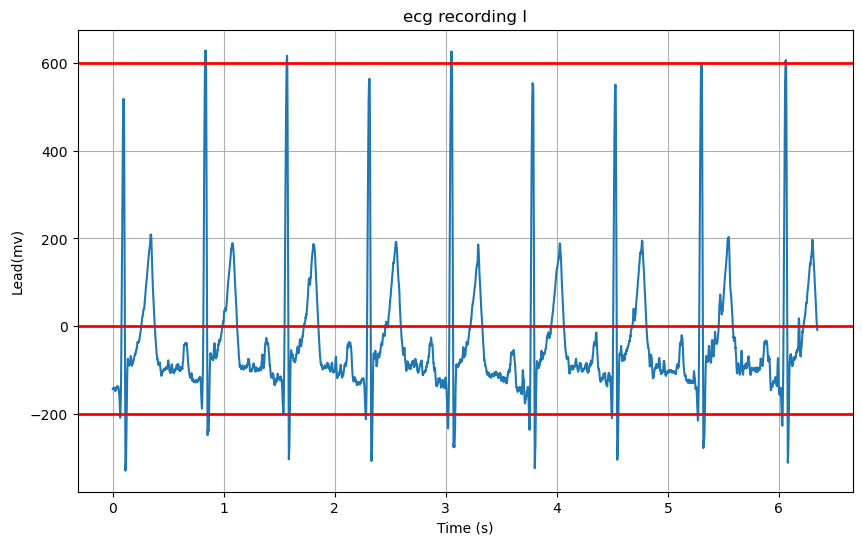

In [55]:
import matplotlib.pyplot as plt 

sampling_frequency = 1024  # Hz
ad_gain = 520e-6  

time = np.arange(len(ecgI)) / sampling_frequency
ecgI_mV = ecgI * (ad_gain * 1000) 
plt.figure(figsize=(10, 6)) 
plt.plot(time, ecgI_mV)
plt.title("ecg recording I")
plt.xlabel("Time (s)")
plt.ylabel("Lead(mv)")
plt.grid(True)
plt.axhline(y=600, color='red', linestyle='-', linewidth=2) 
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)  
plt.axhline(y= -200, color='red', linestyle='-', linewidth=2) 
plt.show()







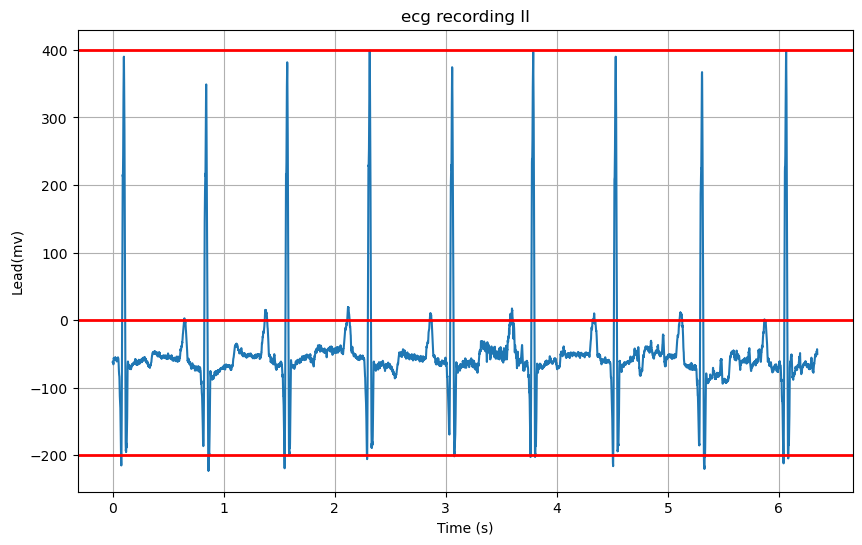

In [56]:
time = np.arange(len(ecgII)) / sampling_frequency
ecgII_mV = ecgII * (ad_gain * 1000)  
plt.figure(figsize=(10, 6))  
plt.plot(time, ecgII_mV)
plt.title("ecg recording II")
plt.xlabel("Time (s)")
plt.ylabel("Lead(mv)")
plt.grid(True)
plt.axhline(y=400, color='red', linestyle='-', linewidth=2) 
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)  
plt.axhline(y= -200, color='red', linestyle='-', linewidth=2) 
plt.show()

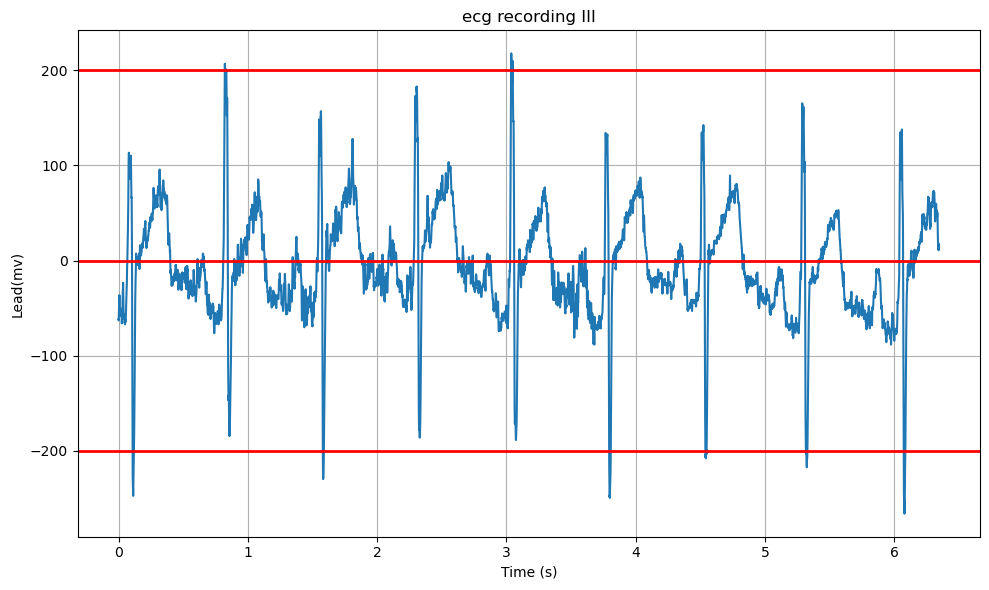

In [57]:
time = np.arange(len(ecgIII)) / sampling_frequency
ecgIII_mV = ecgIII * (ad_gain * 1000)  
plt.figure(figsize=(10, 6))
plt.plot(time, ecgIII_mV)
plt.xlabel("Time (s)")
plt.ylabel("Lead(mv)")
plt.title("ecg recording III")
plt.grid(True)
plt.axhline(y=200, color='red', linestyle='-', linewidth=2) 
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)  
plt.axhline(y= -200, color='red', linestyle='-', linewidth=2) 
plt.tight_layout()
plt.show()

Answer the following questions:

Answers :  

1. **Does this ECG look correctly scaled?**

   No, the ECG is not correctly scaled. The Y-axis shows values from -200 mV to +600 mV, which is far too high for a typical ECG. Normal ECG signals range from -1 mV to +1 mV.

2. **Is this a normal ECG?**

   No, this does not appear to be a normal ECG. The waveform looks irregular and noisy, with unusually high peaks. A normal ECG has distinct patterns (P wave, QRS complex, T wave), which are not clearly visible here.

**Low Pass Filter**

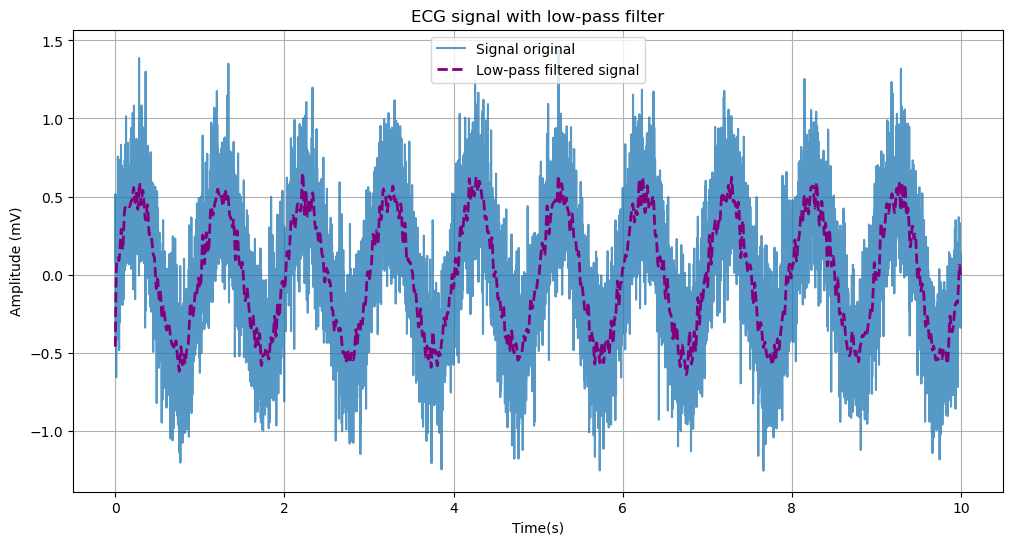

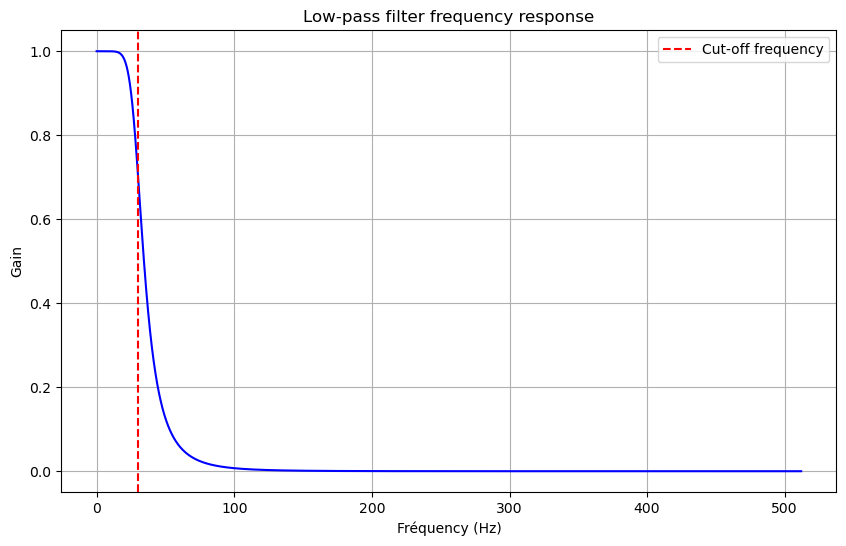

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz

# Paramètres
sampling_frequency = 1024  # Sampling frequency in Hz
ad_gain = 520e-6  # A/D converter gain


def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist  
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def apply_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    filtered_data = filtfilt(b, a, data)  
    return filtered_data


time = np.arange(0, 10, 1/sampling_frequency)  # 10 secondes d'enregistrement
ecg_signal = np.sin(2 * np.pi * 1.0 * time) + 0.5 * np.random.randn(len(time))  # Signal ECG + bruit
ecg_signal_mV = ecg_signal * (ad_gain * 1000)

# Low-pass filter application
cutoff_frequency = 30  # Fréquence de coupure du filtre passe-bas (en Hz)
ecg_filtered_mV = apply_lowpass_filter(ecg_signal_mV, cutoff_frequency, sampling_frequency)

# Original and filtered signal display
plt.figure(figsize=(12, 6))
plt.plot(time, ecg_signal_mV, label='Signal original', alpha=0.75)
plt.plot(time, ecg_filtered_mV, label='Low-pass filtered signal', linestyle='--', color='purple', linewidth=2)

# Chart parameters
plt.title("ECG signal with low-pass filter")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.grid(True)

# Affichage du graphique des signaux
plt.show()

# Affichage de la réponse fréquentielle du filtre
b, a = butter_lowpass(cutoff_frequency, sampling_frequency, order=4)

# Calcul de la réponse en fréquence
w, h = freqz(b, a, worN=8000)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * sampling_frequency * w / np.pi, np.abs(h), 'b')

# Ajout des lignes de coupure et du titre
plt.axvline(cutoff_frequency, color='red', linestyle='--', label='Cut-off frequency')
plt.title("Low-pass filter frequency response")
plt.xlabel('Fréquency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend()

# Affichage de la réponse fréquentielle du filtre
plt.show()


The first graph shows the original signal and the filtered signal side by side, allowing you to visualize the effect of the low-pass filter.
The second graph displays the frequency response of the low-pass filter, showing how the filter affects frequencies above the cutoff frequency (in this case, 30 Hz). This gives a better understanding of how the filter affects high frequencies.